<a href="https://colab.research.google.com/github/JuanDiegoGQ/PARCIAL-01-CORREGIDO/blob/main/Parcial_1_Se%C3%B1ales_y_Sistemas_CORREGIDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUNTO B:

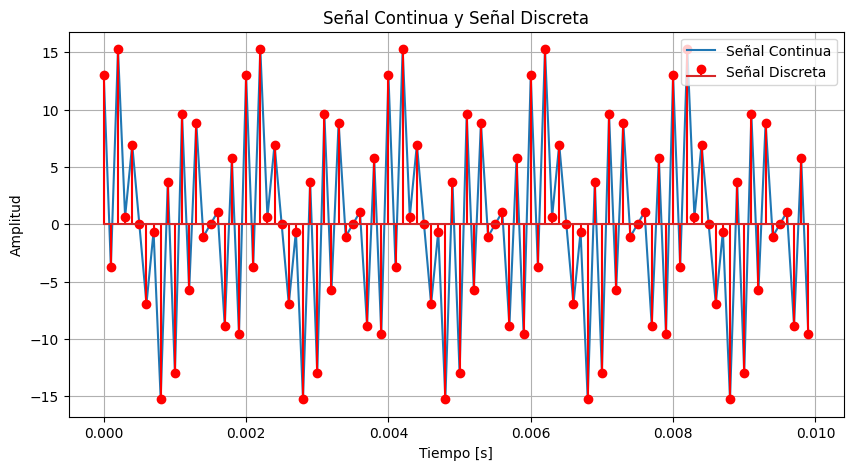

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Especificacion del tiempo de muestreo y el intervalo de tiempo
fs = 10000  # Frecuencia de muestreo en Hz
T = 1 / fs  # Período de muestreo
t = np.arange(0, 0.01, T)  # Intervalo de tiempo de 0 a 0.01 segundos

x = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Grafica de la señal continua y la señal discreta resultante
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Señal Continua')
plt.stem(t, x, 'r', label='Señal Discreta')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal Continua y Señal Discreta')
plt.legend()
plt.grid()
plt.show()

PUNTO C:

Para la señal $$x(t)$$ se tiene que:
$$w1/w2= (1/3)/(1/4)=3/4$$ por ende $$x(t)$$ es cuasiperiodica con periodo:
$$T1=6π$$
$$T2= 8π$$
$$T = T1l=T2k$$
$$T=6πl=8πl$$
El $$MCM(6,8)= 24$$ Entonces:
$$T=24π[s]$$


<ipython-input-13-270ed9526007>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


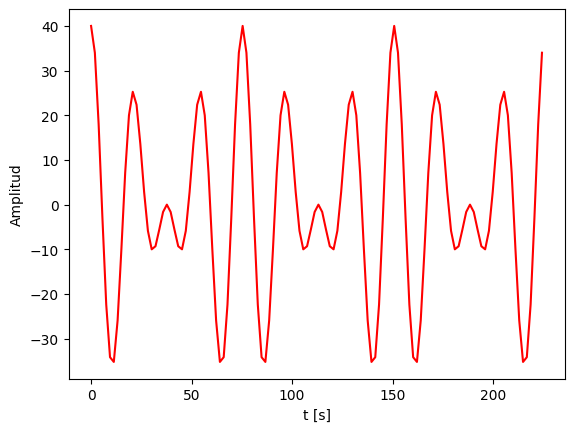

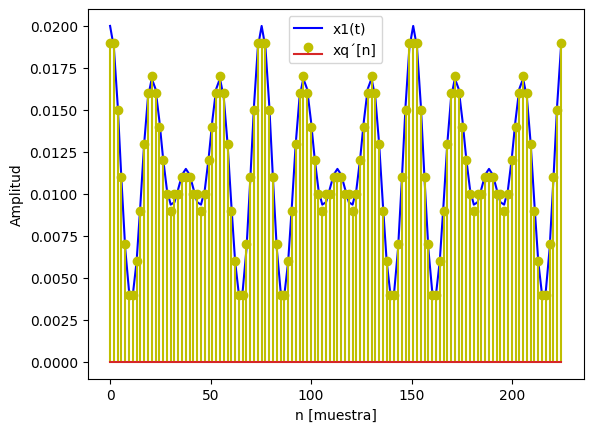

In [ ]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

#Se implementan los codigos de discretizacion y cuantizacion:
from scipy.spatial.distance import cdist

T1 = 6*np.pi #periodo señal 1
T2 = 8*np.pi #periodo señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #periodo cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 0.020
xhmin = 0.004
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 4m[A] a 20m[A]
#asegurar vector columna

#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='x1(t)')
plt.stem(t,xq,'y',label='xq´[n]')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Ahora se procede a encontrar la salida del SLIT aplicando convolucion entre la entrada digital y la respuesta impulso. Como se tiene la respuesta escalon, se calcula la respuesta impulso como:

[ 2 -3  4 -5 10]


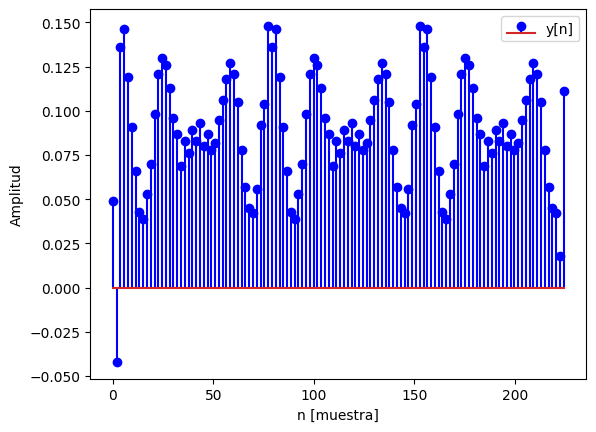

In [ ]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

#La salida del sistema se puede expresar mediante la operacion de convolucion:

y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label='y[n]')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()